# Import data and make category column

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer data
data = load_breast_cancer()

# Convert it to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable to the DataFrame
df['target'] = data.target

# Create a new column 'target_category' and map 1 to 'benign' and 0 to 'malignant'
df['target_category'] = df['target'].map({1: 'benign', 0: 'malignant'})

# Display the DataFrame
#print(df.head)
data.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df.

<function matplotlib.pyplot.show(close=None, block=None)>

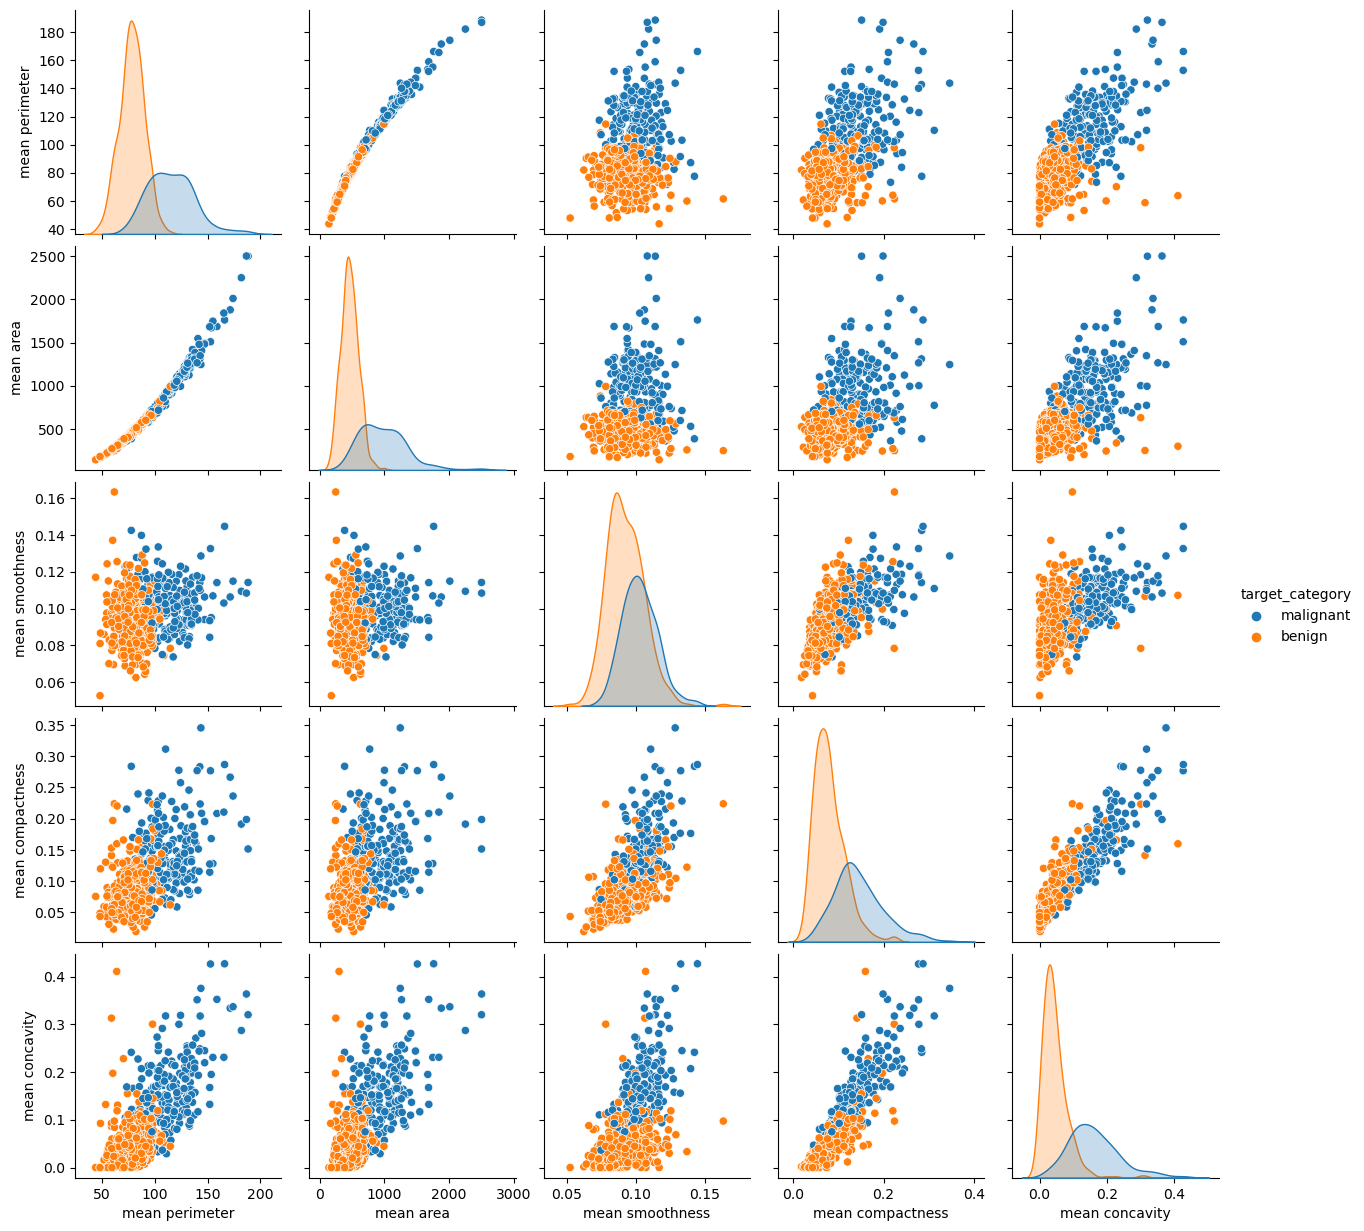

In [33]:
sub_cols = ['mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity']
sns.pairplot(df, hue = 'target_category', vars = sub_cols)
plt.show

In [34]:
df.to_csv('breast_cancer_data_catcol.csv', index=False)

In [27]:
# Show the plot
plt.show()


# load, convert to pandas, and do seaborn pair plot - Working but somewhat opaque

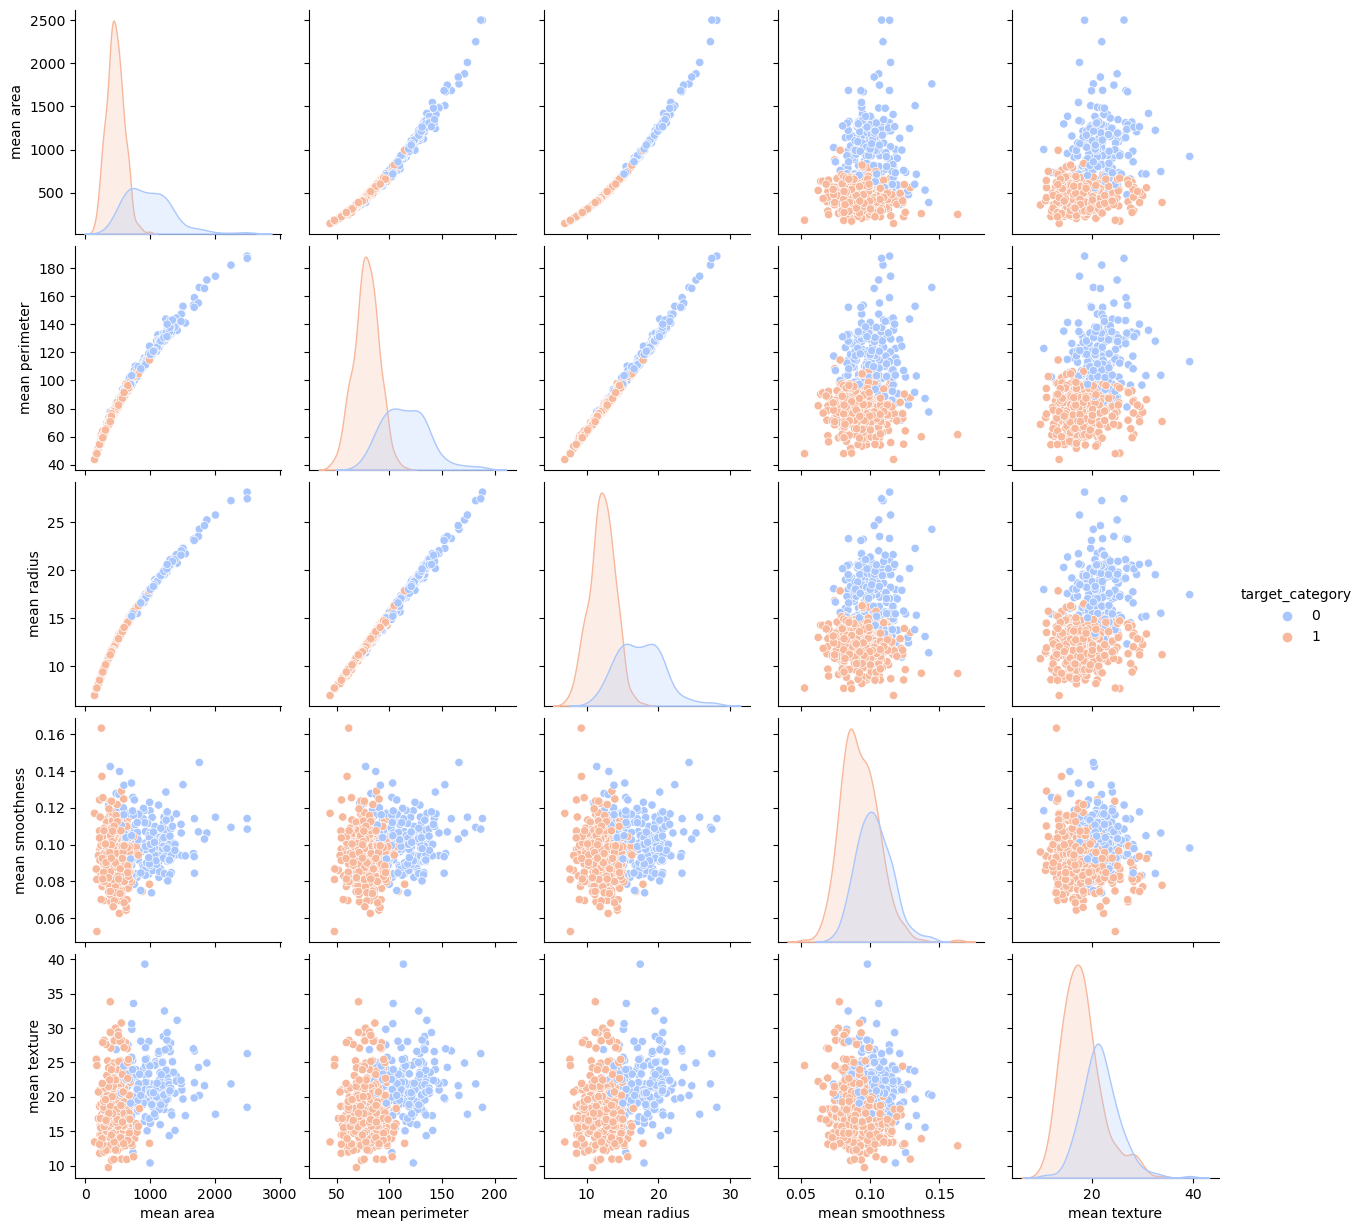

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer data
data = load_breast_cancer()

# Convert it to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable to the DataFrame
df['target'] = data.target

# Create a new column 'target_category' with categorical data type
df['target_category'] = df['target'].astype('category')

# Save the DataFrame as a .csv file
df.to_csv('breast_cancer_data.csv', index=False)

# Create a pair plot of the predictor variables, with hue based on the target_category
# Select a subset of columns for better visualization (you can change this to include other columns)
selected_columns = df.columns[:5]  # Selecting first 5 columns as an example
sns.pairplot(df[selected_columns.union(['target_category'])], hue='target_category', palette='coolwarm')

# Show the plot
plt.show()


# Naive Bayes on all the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier and train it on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Confusion Matrix:
[[ 57   6]
 [  4 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy Score: 94.15%


---

# Do PCA first

Confusion Matrix:
[[ 49  14]
 [  0 108]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.89      1.00      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171

Accuracy Score: 91.81%


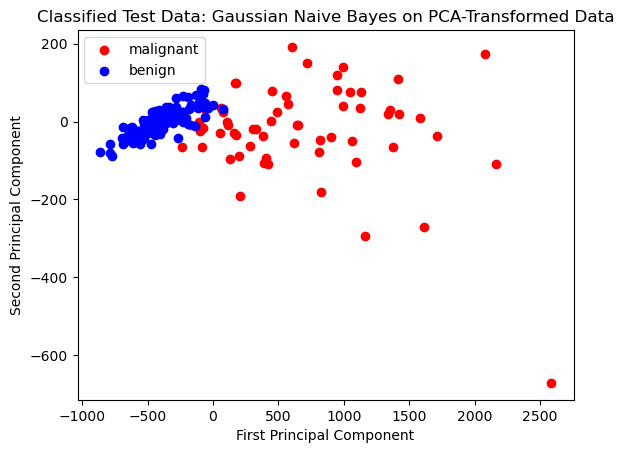

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target

# Perform PCA on the breast cancer dataset, keeping only the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier and train it on the PCA-transformed training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the PCA-transformed testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Scatter plot of the classified test data
colors = ['red', 'blue']
labels = bc.target_names

for i, color, label in zip(range(2), colors, labels):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], color=color, label=label)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("Classified Test Data: Gaussian Naive Bayes on PCA-Transformed Data")
plt.show()


In [5]:
print(bc.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
import seaborn as sns
sns.pairplot(X)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>